In [1]:
#Import all necessary libraries which are useful for Preprocessing the images,training the model,visualise the results
import tensorflow as tf
import PIL
import os
from keras.preprocessing.image import ImageDataGenerator
import random
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop 
import PIL
import seaborn as sns
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras import layers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [2]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
  #Now we import the images from drive folder and create train folder which contains 3662 images and 
  #label folder which has 3662 values of different categories 0,1,2,3,4
  import cv2
  train=[]
  label=[]
  count0=0
  count1=0
  count2=0
  count3=0
  count4=0
  for i in os.listdir(r'/content/drive/MyDrive/Blindness/train'):
    
     trainsetfolder = os.listdir(os.path.join(r'/content/drive/MyDrive/Blindness/train',i))
     for j in trainsetfolder:
          i1 = '/content/drive/MyDrive/Blindness/train'
          img = os.path.join(i1,i,j)
          #img = cv2.imread(img)
          #im_size = (224,224)
          #img = cv2.resize(img,im_size)
          if(i == '0'):
            count0 = count0 + 1
          elif(i == '1'):
            count1 = count1 + 1
          elif(i == '2'):
            count2 = count2 + 1
          elif(i == '3'):
            count3 = count3 + 1
          else:
            count4 = count4 + 1
          train.append(img)
          label.append(i) 
  trainimagescount=[]

  print("length of training:"+str(len(train)))
  for i in range(5):
   if(i == 0):
     print("0 category images are "+str(count0))
     trainimagescount.append(str(count0))
   elif(i == 1):
     print("1 category images are "+str(count1))
     trainimagescount.append(str(count1))
   elif(i == 2):
     print("2 category images are "+str(count2))
     trainimagescount.append(str(count2))
   elif(i == 3):
     print("3 category images are "+str(count3))
     trainimagescount.append(str(count3))
   else:
     print("4 category images are "+str(count4))
     trainimagescount.append(str(count4))
  
 

length of training:3662
0 category images are 1806
1 category images are 370
2 category images are 998
3 category images are 193
4 category images are 295


In [ ]:
#Printing the training set images path
train


['/content/drive/MyDrive/Blindness/train/2/00b74780d31d.png',
 '/content/drive/MyDrive/Blindness/train/2/00a8624548a9.png',
 '/content/drive/MyDrive/Blindness/train/2/00e4ddff966a.png',
 '/content/drive/MyDrive/Blindness/train/2/012a242ac6ff.png',
 '/content/drive/MyDrive/Blindness/train/2/0161338f53cc.png',
 '/content/drive/MyDrive/Blindness/train/2/0180bfa26c0b.png',
 '/content/drive/MyDrive/Blindness/train/2/01c7808d901d.png',
 '/content/drive/MyDrive/Blindness/train/2/01eb826f6467.png',
 '/content/drive/MyDrive/Blindness/train/2/025a169a0bb0.png',
 '/content/drive/MyDrive/Blindness/train/2/026dcd9af143.png',
 '/content/drive/MyDrive/Blindness/train/2/03676c71ed1b.png',
 '/content/drive/MyDrive/Blindness/train/2/033f2b43de6d.png',
 '/content/drive/MyDrive/Blindness/train/2/032d7b0b4bf6.png',
 '/content/drive/MyDrive/Blindness/train/2/03747397839f.png',
 '/content/drive/MyDrive/Blindness/train/2/0415fc68b176.png',
 '/content/drive/MyDrive/Blindness/train/2/03ff7d159f10.png',
 '/conte

In [ ]:
#All the labels assosciated to each of the images where labels are 0,1,2,3,4
label

['2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2'

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


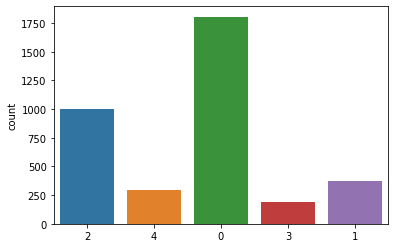

In [ ]:
#Bar chart representaion of dataset distribution to five different classes
sns.countplot(label)


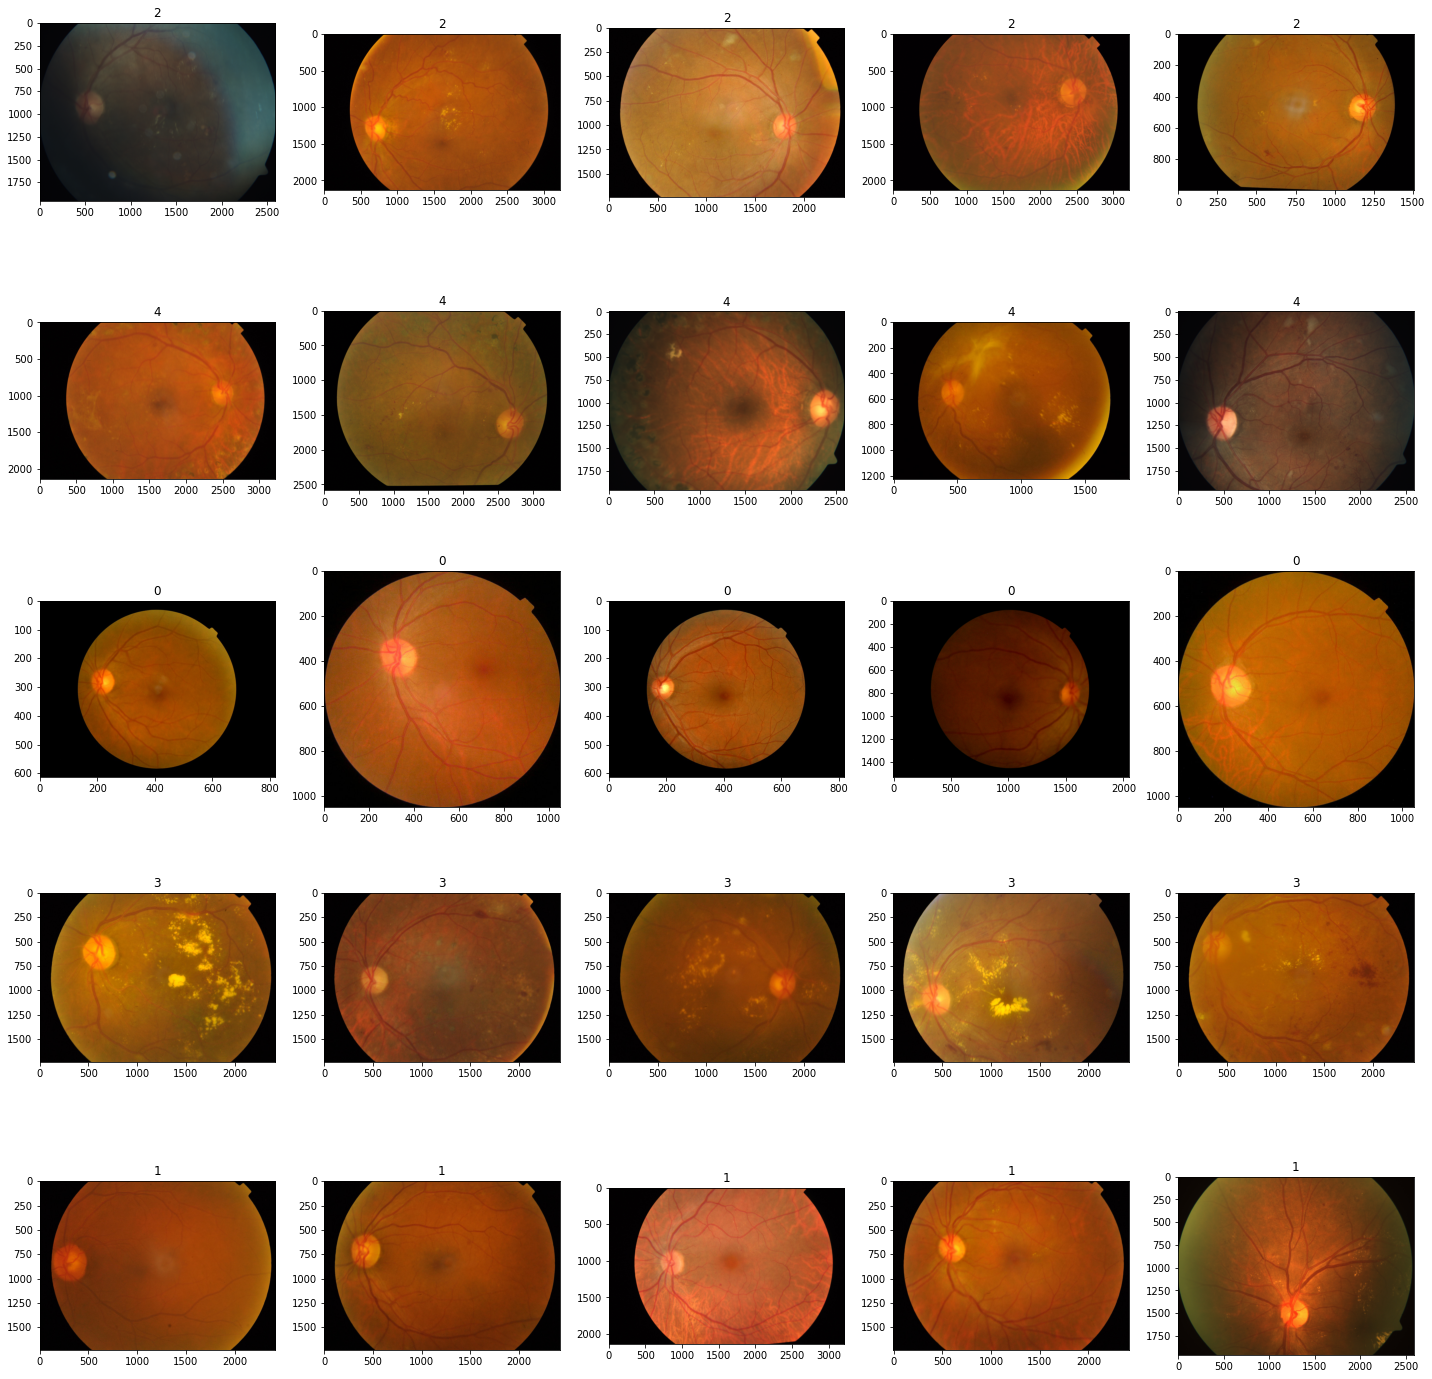

In [ ]:
#We view the images in each of five category.Below is sample visualization of 5 images in each of the 5 categories
fig, axs = plt.subplots(5, 5, figsize = (20, 20))
count = 0
for i in os.listdir('/content/drive/MyDrive/Blindness/train'):
  # get the list of images in a given class
  path = '/content/drive/MyDrive/Blindness/train'
  train_class = os.listdir(os.path.join(path, i))
  # plot 5 images per class
  for j in range(5):
    img = os.path.join(path, i, train_class[j])
    img = PIL.Image.open(img)
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(img)  
  count += 1

fig.tight_layout()

['1806', '370', '998', '193', '295']


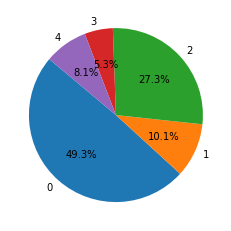

In [ ]:
#Pie chart representaion of dataset distribution to five different classes
figureObject, axesObject = plt.subplots()
print(trainimagescount)
labels=[0,1,2,3,4]
axesObject.pie(trainimagescount,
                labels=labels,autopct='%1.1f%%',startangle=140)


 

plt.show()

In [ ]:
#Creating a dataframe with two columns images (path) and label assosciated to it
retina_df = pd.DataFrame({'Image': train,'Labels':label})
retina_df

,Image,Labels
0,/content/drive/MyDrive/Blindness/train/2/00b74...,2
1,/content/drive/MyDrive/Blindness/train/2/00a86...,2
2,/content/drive/MyDrive/Blindness/train/2/00e4d...,2
3,/content/drive/MyDrive/Blindness/train/2/012a2...,2
4,/content/drive/MyDrive/Blindness/train/2/01613...,2
...,...,...
3657,/content/drive/MyDrive/Blindness/train/1/fe2df...,1
3658,/content/drive/MyDrive/Blindness/train/1/fdd18...,1
3659,/content/drive/MyDrive/Blindness/train/1/fea14...,1
3660,/content/drive/MyDrive/Blindness/train/1/fe674...,1


In [ ]:
#Splitting the dataset into 80% data into training set , 20% data into testing set
retina_df = shuffle(retina_df)
train, test = train_test_split(retina_df, test_size = 0.2)

In [ ]:
#After splitting we have 2929 images in training set
train

,Image,Labels
815,/content/drive/MyDrive/Blindness/train/2/cbc2e...,2
3271,/content/drive/MyDrive/Blindness/train/3/e1900...,3
1483,/content/drive/MyDrive/Blindness/train/0/92e3d...,0
3151,/content/drive/MyDrive/Blindness/train/3/457c7...,3
1294,/content/drive/MyDrive/Blindness/train/0/789f0...,0
...,...,...
2764,/content/drive/MyDrive/Blindness/train/0/4958b...,0
2112,/content/drive/MyDrive/Blindness/train/0/e7291...,0
2195,/content/drive/MyDrive/Blindness/train/0/f2c0b...,0
2435,/content/drive/MyDrive/Blindness/train/0/164cd...,0


In [ ]:
#After splitting we have 733 images in testing set
test

,Image,Labels
1997,/content/drive/MyDrive/Blindness/train/0/d88c4...,0
1494,/content/drive/MyDrive/Blindness/train/0/941d8...,0
1088,/content/drive/MyDrive/Blindness/train/4/51af8...,4
97,/content/drive/MyDrive/Blindness/train/2/196e6...,2
1269,/content/drive/MyDrive/Blindness/train/4/ebe01...,4
...,...,...
558,/content/drive/MyDrive/Blindness/train/2/8d3d6...,2
1701,/content/drive/MyDrive/Blindness/train/0/ae2c3...,0
2226,/content/drive/MyDrive/Blindness/train/0/f64b6...,0
878,/content/drive/MyDrive/Blindness/train/2/dd110...,2


In [ ]:
#Here we crop the images to eliminate any unneccessary data
def crop_image_from_gray(img, tol=7):
    if img.ndim == 2:
        mask = img > tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim == 3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img > tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0):
            return img
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
            img = np.stack([img1,img2,img3],axis=-1)
        return img
IMG_WIDTH = 299
IMG_HEIGHT = 299

#Here we preprocess the image to invoke crop_image function,to resize the images according to CNN architecture

def preprocess_image(image, sigmaX=10):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
    image = cv2.addWeighted (image,4, cv2.GaussianBlur(image, (0,0) ,sigmaX), -4, 128)
    return image

In [ ]:
#Now we create ImageDataGenerator class for Training set and testing set by randomly flippping the images,rotating and 
#applying preprocesssing by cropping the images
#We create validation set which is 15% of 85% training images
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        preprocessing_function=preprocess_image,
        validation_split
        =0.15,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#Now we instantiate the train_generator,validation_generator,test_generator which are used for model training and testing
#The image size for InceptionV3 algorithm is 299,299
#After all the generators are created, we get 2490 training images belonging to five different categories
#439 validation images belonging to five different categories, 733 testing images belonging to five different categories
num_classes = 5
img_size = (299, 299, 3)
epochs = 50
train_generator = train_datagen.flow_from_dataframe(
train,
directory='/content/drive/MyDrive/Blindness',
x_col="Image",
y_col="Labels",
target_size=(299, 299),
color_mode="rgb",
class_mode="categorical",
batch_size=32,
subset='training')


validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory='/content/drive/MyDrive/Blindness',
    x_col="Image",
    y_col="Labels",
    target_size=(299, 299),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation')

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory='/content/drive/MyDrive/Blindness',
    x_col="Image",
    y_col="Labels",
    target_size=(299, 299),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32)



Found 2490 validated image filenames belonging to 5 classes.
Found 439 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


In [ ]:
#Here we are using Transfer learning approach and we instantiate InceptionV3 instance which is pretrained on 
#Imagenet dataset
def get_model(file_path, input_shape, num_classes):
    input_tensor = Input(shape=input_shape)
    base_model = InceptionV3(include_top=False,
                             weights='imagenet',
                             input_tensor=input_tensor)
    base_model.load_weights(filepath=file_path)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.25)(x)
    output_tensor = Dense(num_classes, activation='softmax')(x)
    
    model = Model(inputs=input_tensor, outputs=output_tensor)
    
    optimizer = RMSprop(lr=1e-4)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )
    
    return model


 


In [ ]:
#We are invoking the get_model function by passing imagenetweights which were trained on InceptionV3 architecture
model = get_model(
    file_path='',
    input_shape=img_size,
    num_classes=num_classes
)

In [ ]:
#Adding model checkpoints to save the best weights to the given folder path
#Adding early stopping by monitoring the val_loss with patience 20
checkPoint = ModelCheckpoint(
    filepath='/content/drive/MyDrive/weightsinceptionnet02ndApril.hdf5',
    verbose=1,
    save_best_only=True,
)
earlyStopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    verbose=1,
    mode='min'
)

In [ ]:
#Compiling the model of InceptionV3 architecture
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
#Training the model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.n // 32,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // 32,
    callbacks=[checkPoint, earlyStopping]
)


''' There was one error below after training of epochs is done , we can ignore that as the path was wrong in load_model function'''
from keras.models import load_model
model.save('/content/drive/MyDrive/inceptionmodell2ndapril.h5') 
nmodel = load_model('/content/drive/MyDrive/inceptionmodel2ndapril.h5')

Epoch 1/50
77/77 [==============================] - 3377s 44s/step - loss: 0.8771 - accuracy: 0.6688 - val_loss: 1.3341 - val_accuracy: 0.6971

Epoch 00001: val_loss improved from inf to 1.33412, saving model to /content/drive/MyDrive/weightsinceptionnet02ndApril.hdf5
Epoch 2/50
77/77 [==============================] - 402s 5s/step - loss: 0.5301 - accuracy: 0.7868 - val_loss: 0.8956 - val_accuracy: 0.7837

Epoch 00002: val_loss improved from 1.33412 to 0.89559, saving model to /content/drive/MyDrive/weightsinceptionnet02ndApril.hdf5
Epoch 3/50
77/77 [==============================] - 405s 5s/step - loss: 0.4307 - accuracy: 0.8341 - val_loss: 1.0407 - val_accuracy: 0.7668

Epoch 00003: val_loss did not improve from 0.89559
Epoch 4/50
77/77 [==============================] - 401s 5s/step - loss: 0.3628 - accuracy: 0.8637 - val_loss: 1.4105 - val_accuracy: 0.7764

Epoch 00004: val_loss did not improve from 0.89559
Epoch 5/50
77/77 [==============================] - 403s 5s/step - loss: 0

OSError: ignored

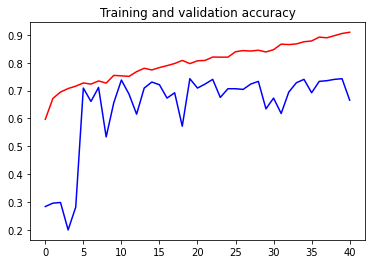

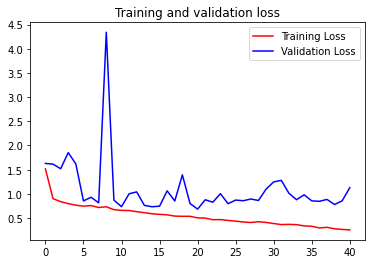

In [ ]:
#Visualize results with accuracy plots and loss plots for both training and validation
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
#print('accuracy'+str(acc))
epochs = range(len(acc)) 
  
plt.plot(epochs, acc, 'r', label='Training accuracy') 
plt.plot(epochs, val_acc, 'b', label='Validation accuracy') 
plt.title('Training and validation accuracy') 
  
plt.figure() 
  
plt.plot(epochs, loss, 'r', label='Training Loss') 
plt.plot(epochs, val_loss, 'b', label='Validation Loss') 
plt.title('Training and validation loss') 
plt.legend() 

22/22 [==============================] - 881s 41s/step - loss: 2.0145 - accuracy: 0.8764


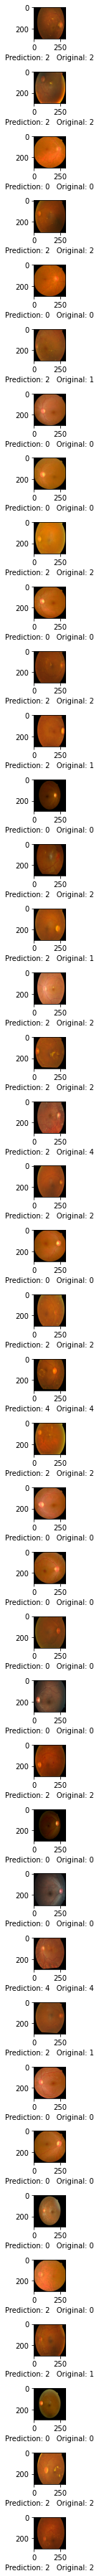

['0', '2', '4', '2', '2', '2', '2', '0', '1', '4', '0', '2', '2', '2', '0', '0', '2', '0', '2', '0', '2', '2', '2', '2', '2', '2', '0', '0', '0', '0', '2', '0', '2', '2', '0', '4', '2', '0', '2', '4', '1', '2', '0', '0', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '0', '0', '0', '0', '2', '0', '0', '4', '1', '0', '0', '0', '2', '0', '0', '2', '0', '0', '0', '0', '2', '0', '2', '0', '0', '2', '0', '0', '2', '4', '2', '2', '0', '0', '0', '0', '2', '2', '0', '0', '0', '0', '0', '2', '0', '0', '2', '0', '0', '0', '0', '0', '0', '2', '1', '2', '0', '0', '2', '0', '0', '0', '0', '0', '0', '2', '2', '0', '0', '0', '0', '1', '2', '2', '2', '2', '2', '0', '4', '2', '0', '0', '2', '0', '2', '2', '0', '0', '0', '0', '0', '2', '2', '0', '2', '0', '2', '2', '2', '1', '0', '2', '2', '2', '0', '0', '0', '0', '2', '4', '4', '0', '2', '2', '0', '0', '2', '2', '0', '2', '0', '0', '0', '2', '2', '0', '2', '0', '2', '4', '2', '0', '0', '0', '0', '0', '2', '2', '2', '0', '4', '0', '0', '2', '2', '0',

In [ ]:
#We are now predicting the accuracy of test set

#We are visualizing the predicted results by showing the image and printing its original severity category and predicted 
#severity category

#Code for visualizing the classification report on how well our model predicted the test set values

evaluate = model.evaluate(test_generator, steps = test_generator.n // 32, verbose =1)

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# import cv2

prediction = []
original = []
image = []
count = 0

for item in range(len(test)):
  # code to open the image
  img= PIL.Image.open(test['Image'].tolist()[item])
  # resizing the image to (299,299)
  img = img.resize((299,299))
  # appending image to the image list
  image.append(img)
  # converting image to array
  img = np.asarray(img, dtype= np.float32)
  # normalizing the image
  img = img / 255
  # reshaping the image in to a 4D array
  img = img.reshape(-1,299,299,3)
  # making prediction of the model
  predict = nmodel.predict(img)
  # getting the index corresponding to the highest value in the prediction
  predict = np.argmax(predict)
  #predict = predict.astype(str)
  # appending the predicted class to the list
  prediction.append(labels[predict])
  # appending original class to the list
  original.append(test['Labels'].tolist()[item])

  import random
fig=plt.figure(figsize = (50,50))
for i in range(40):
    j = random.randint(0,len(image))
    fig.add_subplot(40, 1, i+1)
    plt.xlabel("Prediction: " + str(prediction[j]) +"   Original: " + str(original[j]))
    plt.imshow(image[j])
fig.tight_layout()
plt.show()

prediction = [str(x) for x in prediction]
print(prediction)

print(classification_report(original,prediction))